In [1]:
# Importing Important Libraries

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns

import plotly 
import plotly.express as px
import plotly.offline as pyo
import cufflinks as cf
from plotly.offline import init_notebook_mode,plot,iplot

In [2]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
# Reading Dataset

iris_df = pd.read_csv('Iris.csv')

In [4]:
iris_df.head() # Printing head of iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris_df.drop('Id',axis=1,inplace=True) # dropping Id Column from iris_df because it is of no use

In [6]:
iris_df.head() # Printing head of iris_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
iris_df.shape # to check shape of iris_df

(150, 5)

In [8]:
iris_df.size # to check size of iris_df

750

In [9]:
iris_df.info() # to check info of iris_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [10]:
iris_df.describe() # to check description of iris_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
iris_df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

# Visualization

In [12]:
px.scatter(iris_df,x='Species',y='PetalWidthCm')

In [13]:
px.scatter(iris_df,x='Species',y='PetalWidthCm',size='PetalWidthCm')

In [14]:
px.scatter(iris_df,x='Species',y='SepalWidthCm')

<BarContainer object of 150 artists>

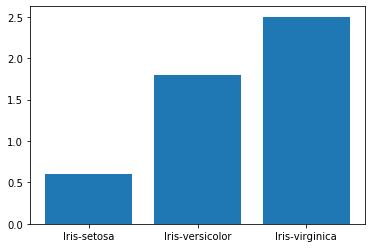

In [15]:
plt.bar(iris_df['Species'],iris_df['PetalWidthCm'])

In [16]:
px.bar(iris_df,x='Species',y='PetalWidthCm')

In [17]:
iris_df.iplot(kind='bar',x='Species',y='PetalWidthCm')

In [18]:
px.line(iris_df,x='Species',y='PetalWidthCm')

In [19]:
px.scatter_matrix(iris_df,color='Species',title='Iris',
                  dimensions=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
                 height=650)

In [20]:
iris_df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [21]:
X1 = iris_df.drop('Species',axis=1) # Training Data

In [22]:
y1 = iris_df['Species'] # Testing Data

# Data Preprocessing

In [23]:
# Importing LabelEncoder

from sklearn.preprocessing import LabelEncoder

In [24]:
le = LabelEncoder() # Instantiating LabelEncoder

In [25]:
y1 = le.fit_transform(y1)

In [26]:
y1 # Printing y1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [27]:
# Species_transformed Details
# 0 ----> Iris-setosa
# 1 ----> Iris-versicolor
# 2 ----> Iris-virginica

# Train Test Split

In [28]:
# Importing train_test_split

from sklearn.model_selection import train_test_split

In [29]:
# Splitting data into training and testing data

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

# Decision Tree Classifier

In [30]:
# Importing DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [31]:
dtree = DecisionTreeClassifier() # Instantiating DecisionTreeClassifier

In [32]:
dtree.fit(X_train,y_train) # Training Using Decision Tree Classifier

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [33]:
prediction_dtree = dtree.predict(X_test) # Making Prediction Using Decision Tree Classifier

In [34]:
# Importing Libraries to check classification_report, confusion_matrix, accuracy_score

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [35]:
# Calculating Accuracy Score using Decision Tree Classifier

accuracy_dtree = accuracy_score(y_test,prediction_dtree)*100

In [36]:
# Printing Accuracy Score using Decision Tree Classifier

print(f'Accuracy using Decision Tree Classifier is : {accuracy_dtree}%')

Accuracy using Decision Tree Classifier is : 100.0%


In [37]:
# Printing Confusion Metrix using Decision Tree Classifier

print(f'Confusion Metrix using Decision Tree Classifier is : ')
print()
print(confusion_matrix(y_test,prediction_dtree))

Confusion Metrix using Decision Tree Classifier is : 

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [38]:
# Printing Classification Report using Decision Tree Classifier

print(f'Classification Report using Decision Tree Classifier is : ')
print()
print(classification_report(y_test,prediction_dtree))

Classification Report using Decision Tree Classifier is : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# Standard Scaler

In [39]:
# Importing StandarScaler

from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler().fit(X_train)

In [41]:
X_train_scaled = scaler.transform(X_train) # Transforming Data Using StandarScaler

In [42]:
X_test_scaled = scaler.transform(X_test) # Transforming Data Using StandarScaler

In [43]:
# Importing KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier

In [44]:
knn = KNeighborsClassifier(n_neighbors=2) # Instantiate KNeighborsClassifier

In [45]:
knn.fit(X_train_scaled,y_train) # Training Using KNN

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [46]:
prediction_knn = knn.predict(X_test_scaled) # Making Prediction using KNN

In [47]:
# Calculating Accuracy Score using KNN

accuracy_knn = accuracy_score(y_test,prediction_knn)*100

In [48]:
# Printing Accuracy Score of KNN

print(f'Accuracy using KNN Classifier is : {accuracy_knn}%')

Accuracy using KNN Classifier is : 97.77777777777777%


In [49]:
# Printing Confusion Metrix of KNN

print(f'Confusion Metrix using KNN Classifier is : ')
print()
print(confusion_matrix(y_test,prediction_knn))

Confusion Metrix using KNN Classifier is : 

[[19  0  0]
 [ 0 13  0]
 [ 0  1 12]]


In [50]:
# Printing Classification Report of KNN

print(f'Classification Report using KNN Classifier is : ')
print()
print(classification_report(y_test,prediction_knn))

Classification Report using KNN Classifier is : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [51]:
# Elbow method to find minimum error rate

scores = {}
scores_list = []

for k in range(1,26):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled,y_train)
    predicted_k = knn.predict(X_test_scaled)
    accuracy_k = accuracy_score(y_test,predicted_k)
    scores[k] = accuracy_k
    scores_list.append(accuracy_k)


In [52]:
scores # Printin Scores

{1: 0.9777777777777777,
 2: 0.9777777777777777,
 3: 1.0,
 4: 0.9777777777777777,
 5: 1.0,
 6: 1.0,
 7: 1.0,
 8: 1.0,
 9: 1.0,
 10: 1.0,
 11: 1.0,
 12: 1.0,
 13: 1.0,
 14: 1.0,
 15: 1.0,
 16: 1.0,
 17: 1.0,
 18: 0.9777777777777777,
 19: 1.0,
 20: 1.0,
 21: 1.0,
 22: 1.0,
 23: 1.0,
 24: 0.9777777777777777,
 25: 0.9555555555555556}

Text(0, 0.5, 'Model Accuracy Score')

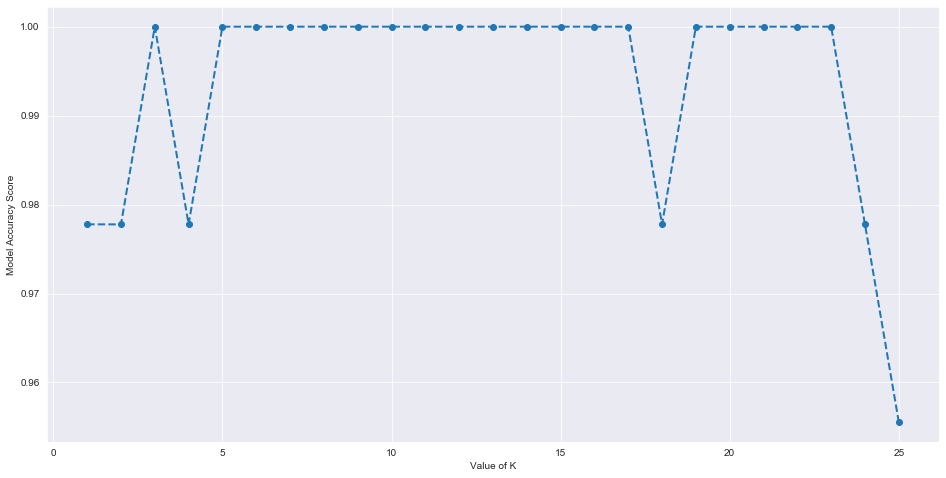

In [53]:
# style.use('ggplot')
sns.set_style('darkgrid')

plt.figure(figsize=(16,8))
plt.plot(range(1,26),scores_list,'--o',linewidth=2,)
plt.xlabel('Value of K')
plt.ylabel('Model Accuracy Score')

# K Means Clustering

In [54]:
# Importing KMeans

from sklearn.cluster import KMeans

In [55]:
kmeans = KMeans(n_clusters=3,random_state=2,n_jobs=4) # Instantiate KMeans

In [56]:
kmeans.fit(X1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=4, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [57]:
centers = kmeans.cluster_centers_ # Checking centers using Kmeans

In [58]:
centers # Printing Centers

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [59]:
new_labels = kmeans.labels_  # Assigning Model Predicted Labels Into new_labels variable

In [60]:
new_labels # Printing new_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

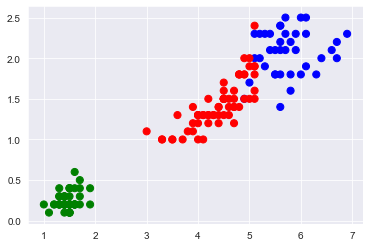

In [61]:
colormap=np.array(['Red','green','blue'])
fig=plt.scatter(iris_df['PetalLengthCm'],iris_df['PetalWidthCm'],c=colormap[kmeans.labels_],s=50)

Text(0.5, 1.0, 'Predicted')

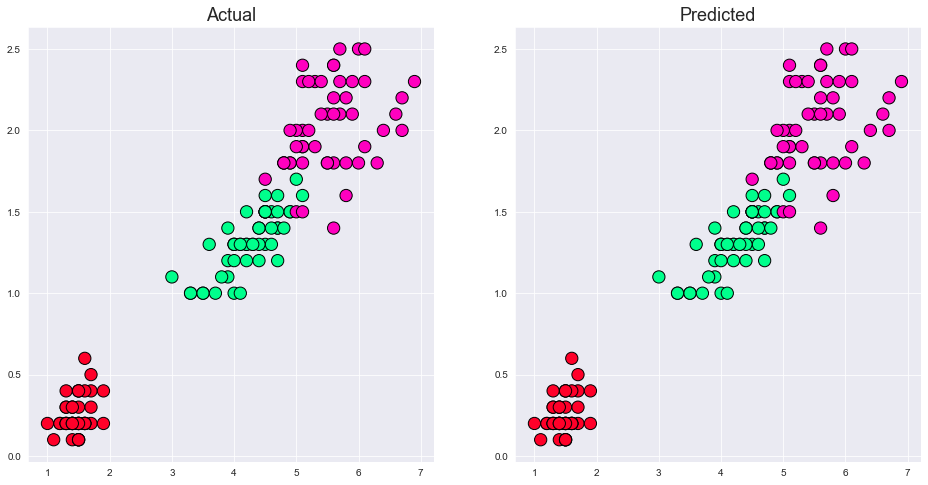

In [62]:
# Visualization of Actual vs Predicted Result

new_labels=kmeans.labels_
fig,axes=plt.subplots(1,2,figsize=(16,8))
axes[0].scatter(iris_df.iloc[:,2],iris_df.iloc[:,3],c=y1,cmap='gist_rainbow',edgecolor='k',s=150)
axes[1].scatter(iris_df.iloc[:,2],iris_df.iloc[:,3],c=y1,cmap='gist_rainbow',edgecolor='k',s=150)
axes[0].set_title('Actual',fontsize=18)
axes[1].set_title('Predicted',fontsize=18)

In [63]:
Catagory_kmeans=['Iris-Versicolor', 'Iris-Setosa', 'Iris-Virginica']

In [64]:
#Lets predict on custom input value

In [65]:
X_km=np.array([[1 ,1, 1, 1]])

In [66]:
X_km_prediction=kmeans.predict(X_km)
X_km_prediction[0]
print(Catagory_kmeans[int(X_km_prediction[0])])

Iris-Setosa
